<a href="https://colab.research.google.com/github/saeedahmadicp/Numerical-Methods/blob/main/NM_Assignment_4_Polynomial_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 4 (Polynomial Interpolation)**

## **Name: Saeed Ahmad**
## **Department: DCIS(18-22)**
## **Class No: 26**





# Langrange interpolation

In [ ]:
from scipy.interpolate import lagrange
from math import *
import parser
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

In [ ]:
def eq_value(eq, x):
    return eval(parser.expr(eq).compile())

In [ ]:
n_points = int(input("Enter number of points for lagrange polynomial: "))
y_option = int(input("Press 1 to input y-coordinates or press 2 to enter a function f(x): "))

if y_option == 2:
    eq = input("Enter equation: ")

x= []
y = []

for i in range(0, n_points):
    x.append(float(input(f"Enter x-coordinate of point {i+1}: ")))
    
    if y_option == 1:
        y.append(float(input(f"Enter y-coordinate of point {i+1}: ")))

Enter number of points for lagrange polynomial: 4
Press 1 to input y-coordinates or press 2 to enter a function f(x): 2
Enter equation: x**3+4.001*x**2+4.002*x+1.101
Enter x-coordinate of point 1: -0.5
Enter x-coordinate of point 2: -0.25
Enter x-coordinate of point 3: 0.25
Enter x-coordinate of point 4: 0.5


In [ ]:
if y_option == 2:
    for i in range(0, n_points):
        y.append(float(eq_value(eq, x[i])))

In [ ]:
lagrange_polynomials = []
for i in range(2, n_points+1):
    poly = lagrange(x[0:i], y[0:i])
    coefficients = (Polynomial(poly).coef)
    lagrange_polynomials.append(np.poly1d(coefficients))
    print(f"The lagrange polynomial for degree {i} is \n{np.poly1d(coefficients)}")
    if i ==2:
      eq = np.poly1d(coefficients)

The lagrange polynomial for degree 2 is 
 
1.439 x + 0.6946
The lagrange polynomial for degree 3 is 
       2
3.501 x + 4.064 x + 1.132
The lagrange polynomial for degree 4 is 
   3         2
1 x + 4.001 x + 4.002 x + 1.101


In [ ]:
x_values = np.linspace(0,1,10)
fun_values = []
predict_values = []

for i in range(len(x_values)):
    fun_values.append(float(eq_value(eq, x_values[i])))
    
for j in lagrange_polynomials:
    values = []
    for i in range(len(x_values)):
        values.append(float(j(x_values[i])))
    predict_values.append(values)

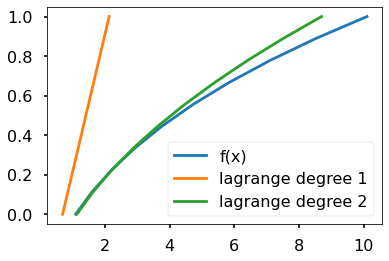

In [ ]:
plt.plot(fun_values,x_values, label='f(x)')
plt.plot(predict_values[0], x_values, label='lagrange degree 1')
plt.plot(predict_values[1], x_values, label='lagrange degree 2')
plt.legend()
plt.show()

# Newton’s Divided-Difference

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

In [ ]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

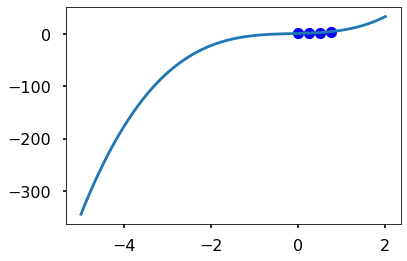

In [ ]:
x = np.array([0, 0.25, 0.5, 0.75])
y = np.array([1, 1.64872, 2.71828, 4.48169])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)